In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.acquire_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
train, validate, test = w.train_val_test(df)
train, validate, test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 3761            9.9             0.490         0.23            2.40      0.087   
 3740            7.7             0.280         0.35           15.30      0.056   
 1359           11.6             0.475         0.40            1.40      0.091   
 1230            7.7             0.180         0.34            2.70      0.066   
 4751            7.6             0.250         1.23            4.60      0.035   
 ...             ...               ...          ...             ...        ...   
 3772            7.6             0.320         0.58           16.75      0.050   
 5191            5.6             0.280         0.27            3.90      0.043   
 5226            6.4             0.370         0.20            5.60      0.117   
 5390            6.5             0.260         0.50            8.00      0.051   
 860             7.2             0.620         0.06            2.70      0.077   
 
       free su

In [4]:
# train_scaled, val_scaled, test_scaled = w.wrangle_wine()


In [5]:
# train_scaled.info()

In [6]:
# train_scaled.describe(include='all')

In [7]:
# train_scaled.quality

In [8]:
# sns.regplot(x='alcohol', y='quality', data=train_scaled)
# plt.show()

In [9]:
wine_type = w.clean_wine()
wine_type.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,37.313433,32.653061,3.769231,1.465882,0.144118,3.880597,100.000000,0.014878,0.047761,25.769231
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,27.777778,35.434783,4.260870,1.533846,0.141538,4.259259,106.521739,0.018463,0.060370,23.478261
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,28.333333,42.133333,5.157895,1.720690,0.129310,3.166667,130.666667,0.016633,0.052667,31.578947
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737


In [10]:
df['quality'] = pd.cut(df['quality'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])

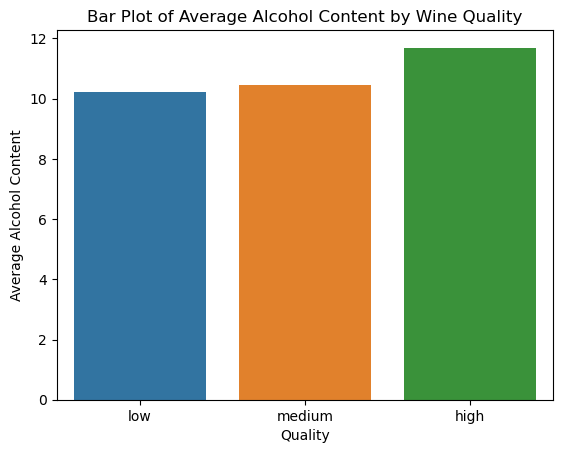

In [11]:
sns.barplot(data=df, x='quality', y='alcohol', ci = None)

plt.title('Bar Plot of Average Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.show()

<BarContainer object of 4547 artists>

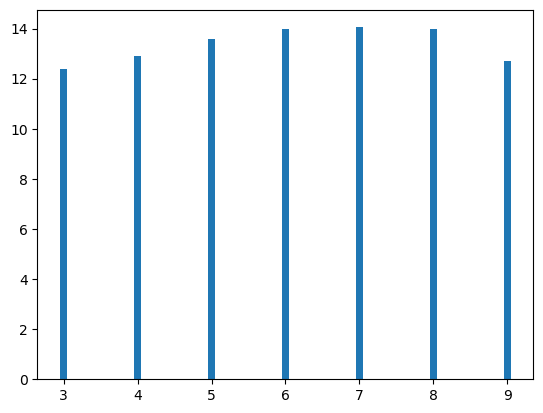

In [12]:
plt.bar(x='quality',height='alcohol',data=train,width=.1,)


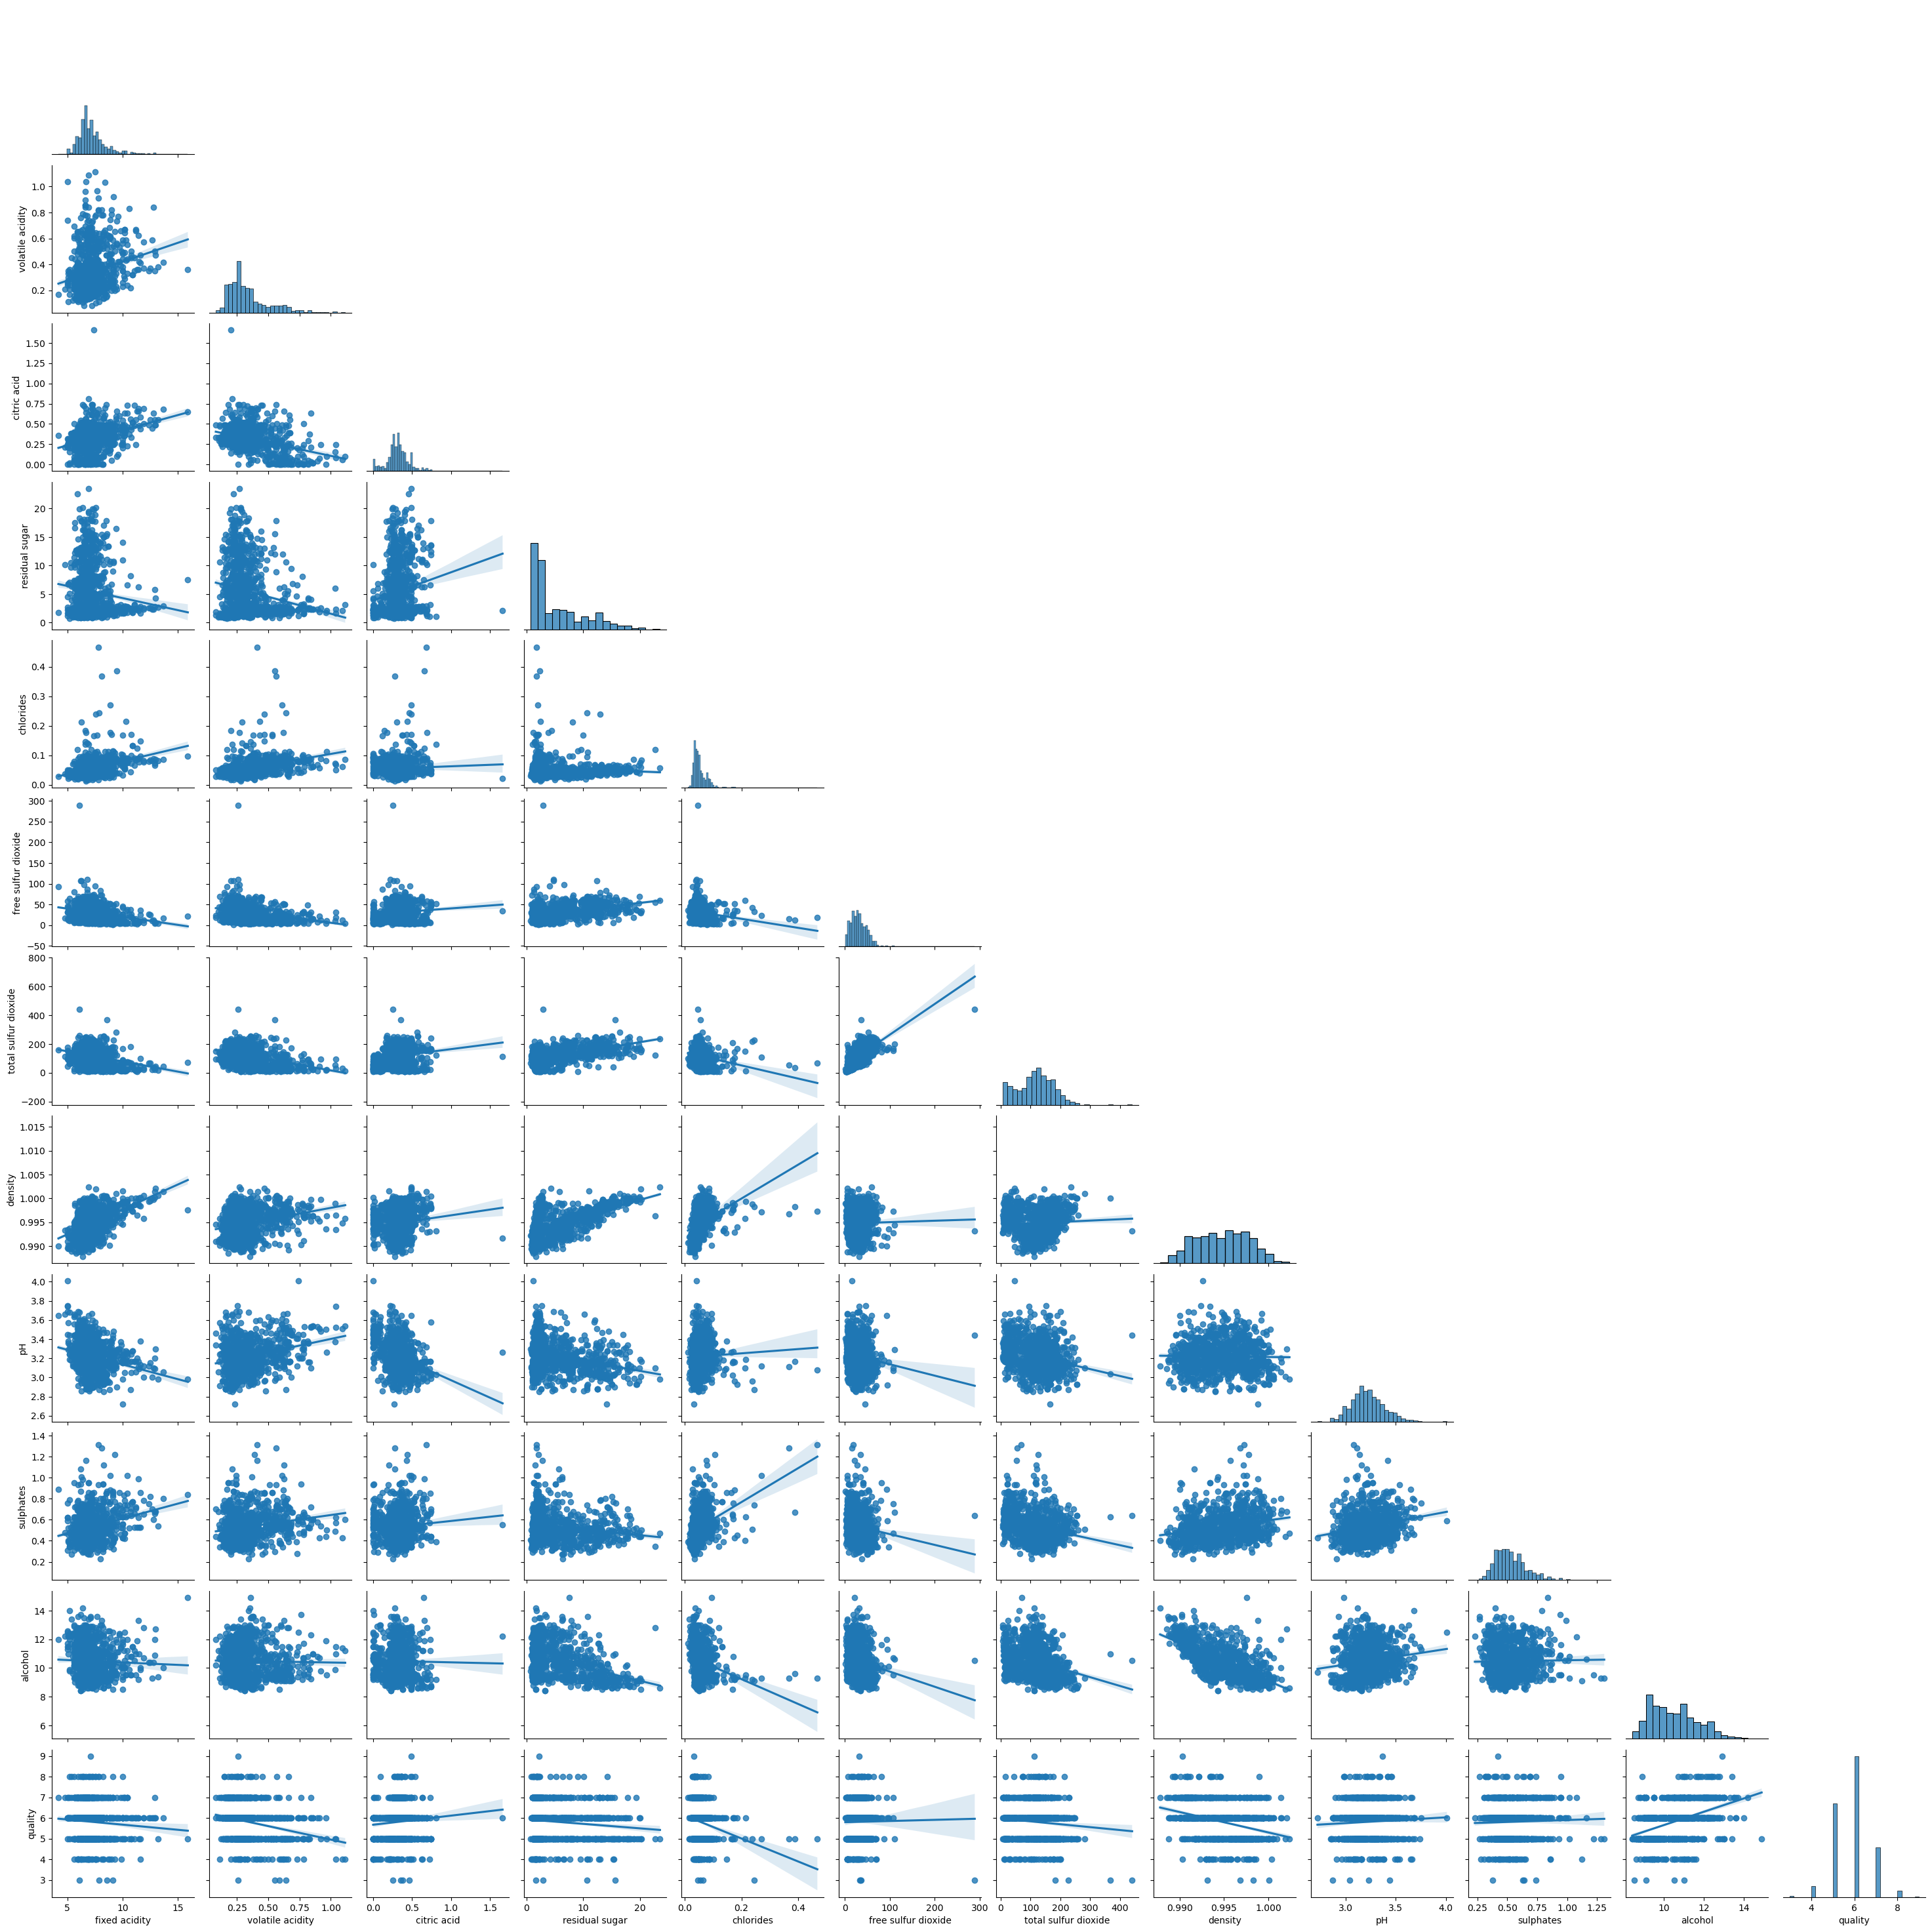

In [13]:
sns.pairplot(test, kind='reg',corner=True)
# grid of scatter plots for each pair of numerical columns in the test
# quickly examining relationships and correlations between numerical variables in the dataset

In [14]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

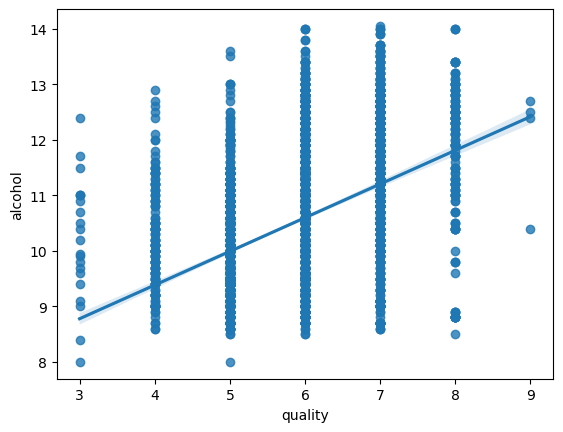

In [15]:
sns.regplot(y='alcohol', x='quality', data=train)
plt.show()

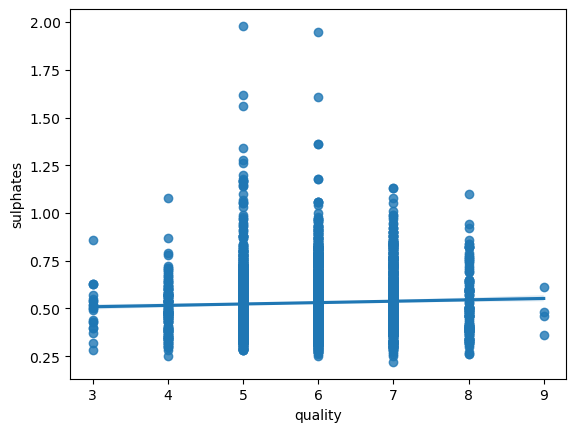

In [16]:
sns.regplot(y='sulphates', x='quality', data=train)
plt.show()

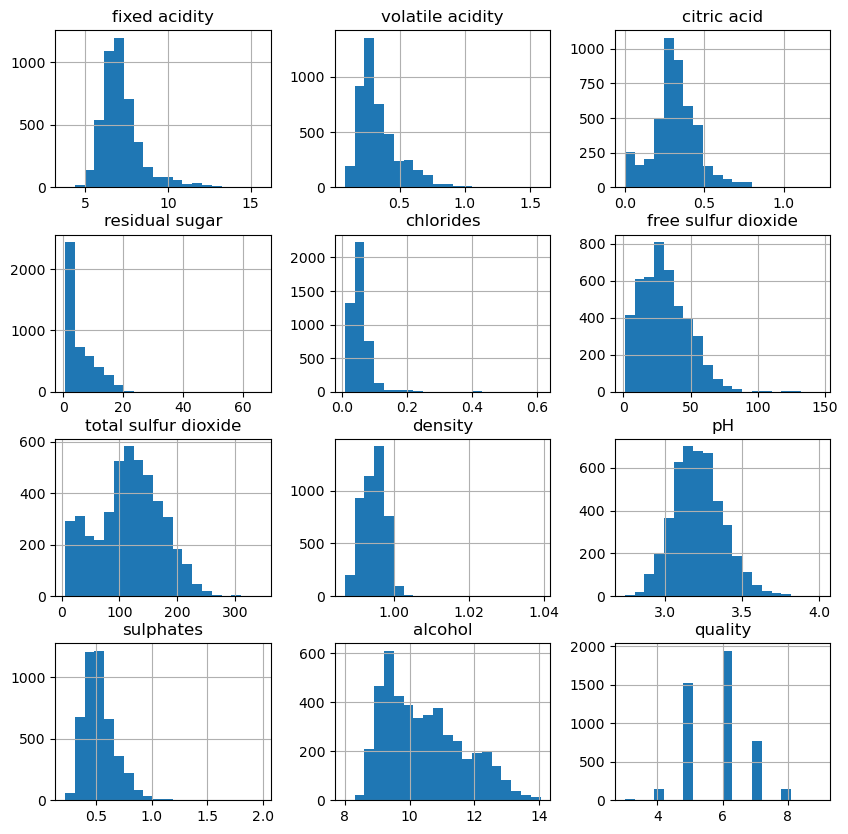

In [17]:
train.hist(bins=20, figsize=(10, 10))
plt.show()

In [18]:
# # Convert the 'quality' column to category type if it isn't already
# df['quality'] = df['quality'].astype('category')

# # Convert category to numerical values
# df['quality'] = df['quality'].cat.codes

# # Now both columns should be numerical


In [19]:
import scipy.stats as stats

In [20]:
# def run_sulphates_ttest(data):
#     '''
#     runs a Ttest for sulphates vs quality
#     '''
#     # Check for columns
#     if 'sulphates' not in data.columns or 'quality' not in data.columns:
#         return "Columns not found in the DataFrame"
    
#     # Define Hypothesis
#     print("Null Hypothesis: There is no significant difference between the sulphate levels and wine quality.")
#     print("Alternative Hypothesis: There is a significant difference between the sulphate levels and wine quality.")
    
#     x = data['sulphates']
#     y = data['quality']
    
#     # Scatter Plot
#     sns.barplot(x='quality', y='sulphates', data=data, ci = None)
#     plt.title('Bar plot of Volatile Acidity by Quality')
#     plt.show()
    
    
#     # Perform t-test
#     t_statistic, p_value = stats.ttest_ind(x, y)
    
#     # Decide whether to reject the null hypothesis
#     alpha = 0.05
#     if p_value <= alpha:
#         decision = "Reject Null Hypothesis"
#     else:
#         decision = "Fail to Reject Null Hypothesis"
        
#     # Create a DataFrame to store the results
#     results = pd.DataFrame({
#         'T-Statistic': [t_statistic],
#         'P-Value': [p_value],
#         'Decision': [decision]
#     })
    
#     return results
# run_sulphates_ttest(df)


In [21]:
print(df['sulphates'].dtype)
print(df['quality'].dtype)


float64
category


In [22]:
# print(df['quality'].unique())


In [23]:
df = df.dropna(subset=['quality'])


In [39]:
def eval_p(p, a=0.05, decimal_places=2):
    """
    Evaluate the p-value and print the result of hypothesis testing hued by quality.

    Args:
        p (float): The p-value to evaluate.
        a (float, optional): The significance level (default is 0.05).
        decimal_places (int, optional): The number of decimal places for formatting p-value (default is 2).

    Returns:
        None
    """
    formatted_p = "{:.{precision}e}".format(p, precision=decimal_places)
    if p < a:
        print(f'\nWe reject the null hypothesis with a p-value of {formatted_p}.')
    else:
        print(f'\nWe failed to reject the null hypothesis with a p-value of {formatted_p}.')

In [84]:
def pearson_test(data, x_col, y_col, a=0.05, decimal_places=2):
    '''
    runs a perason r test for citric acid and fixed acidity correlation.
    '''
    
    # First check if the columns are in the DataFrame
    if 'citric acid' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print('\n----------------------------------------------------------------------------------------------------\n')
     # Calculate Pearson's correlation coefficient and p-value
    r, p = stats.pearsonr(data[x_col], data[y_col])

    print(f'r_value: {r:.4f}\n')
    formatted_p = "{:.{precision}e}".format(p, precision=decimal_places)
    print(f'p_value: {formatted_p}\n')
    
    # Create a scatter plot for visualization
    sns.scatterplot(x=x_col, y=y_col, data=data, hue='quality')
    plt.title('Scatter Plot of Citric Acid vs Fixed Acidity')
    plt.show()
    
    # Perform pearson_r test
    eval_p(p)


----------------------------------------------------------------------------------------------------

r_value: 0.3244

p_value: 4.19e-159



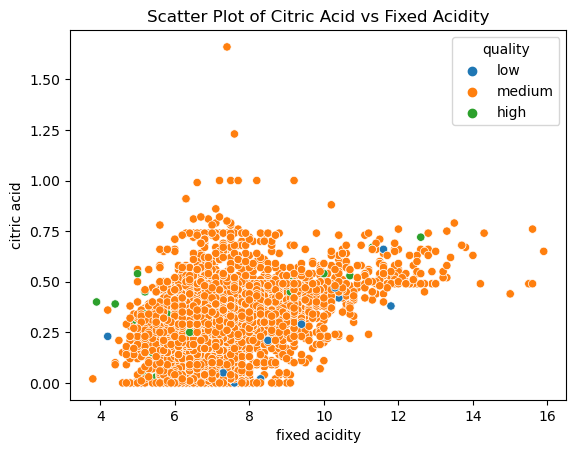


We reject the null hypothesis with a p-value of 4.19e-159.


In [85]:
pearson_test(df, 'fixed acidity', 'citric acid')

In [83]:
analysis_3(df, 'citric acid', 'fixed acidity', 'quality')



----------------------------------------------------------------------------------------------------

r_value: 0.3244

p_value: 4.19e-159



TypeError: regplot() got an unexpected keyword argument 'hue'

In [ ]:
def run_alcohol_ttest(data):
    '''
    runs a Ttest for alcohol vs quality
    '''
    
    #  check if the columns are in the DataFrame
    if 'alcohol' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print("Null Hypothesis: There is no significant difference between alcohol levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between alcohol levels and wine quality.")
    
    #  scatter plot for visualization
    sns.barplot(x='quality', y='alcohol', data=data, ci = None)
    plt.title('Bar Plot of Alcohol vs Quality')
    plt.show()
    
    x = data['alcohol']
    y = data['quality']
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results

# Assuming `df` is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Run the t-test function
run_alcohol_ttest(df)


In [ ]:
def run_volatile_acidity_ttest(data):
    '''
    runs a Ttest for volatile acidity vs quality
    '''
    if 'volatile acidity' not in data.columns or 'quality' not in data.columns:
        return 'The required columns are not found in the DF.'

    # Define and print the hypothesis
    print('Null Hypothesis: There is no significant difference between the volatile acidity and wine quality.')
    print('Alternate Hypothesis: There is a significant difference between the volatile acidity level and wine quality.')

    # Bar plot for visualization
    sns.barplot(x='quality', y='volatile acidity', data=data, ci = None)
    plt.title('Bar plot of Volatile Acidity by Quality')
    plt.show()
    
    x = data['volatile acidity']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:  # Changed this line to be more accurate, as you typically reject the null if p <= alpha
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

run_volatile_acidity_ttest(df)


In [ ]:
alpha = 0.05

In [ ]:
overall_mean = train.quality.mean()
overall_mean

In [ ]:
#is there a relation between alcholol and quality